In [1]:
import os.path as osp
import sys
cur_dir = osp.dirname(osp.abspath(''))
PROJ_ROOT = osp.normpath(osp.join(cur_dir))
sys.path.insert(0, PROJ_ROOT)
print(PROJ_ROOT)

from core.gdrn_modeling.demo.predictor_yolo import YoloPredictor
from core.gdrn_modeling.demo.predictor_gdrn import GdrnPredictor

import os

import cv2
import matplotlib.pyplot as plt

/home/meuli/gdrnpp_wkspc/gdrnpp_bop2022


/home/meuli/gdrnpp_wkspc/.venv/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


You requested to import horovod which is missing or not supported for your OS.
[2023-11-06 10:49:26,285] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/meuli/gdrnpp_wkspc/gdrnpp_bop2022/lib/pysixd/misc.py:586: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_obj_im_c(K, t):
/home/meuli/gdrnpp_wkspc/gdrnpp_bop2022/lib/pysixd/misc.py:765: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def compute_2d_bbox_xyxy_from_pose(points, pose, K, width=640, height=480, clip=False):
/home/meuli/gdrnpp_wkspc/gdrnpp_

vispy uses app: egl, gl: gl2


In [2]:
img_set = "000050"
img_num = "000923"

In [3]:
classes = {
                0: "002_master_chef_can",  # [1.3360, -0.5000, 3.5105]
                1: "003_cracker_box",  # [0.5575, 1.7005, 4.8050]
                2: "004_sugar_box",  # [-0.9520, 1.4670, 4.3645]
                3: "005_tomato_soup_can",  # [-0.0240, -1.5270, 8.4035]
                4: "006_mustard_bottle",  # [1.2995, 2.4870, -11.8290]
                5: "007_tuna_fish_can",  # [-0.1565, 0.1150, 4.2625]
                6: "008_pudding_box",  # [1.1645, -4.2015, 3.1190]
                7: "009_gelatin_box",  # [1.4460, -0.5915, 3.6085]
                8: "010_potted_meat_can",  # [2.4195, 0.3075, 8.0715]
                9: "011_banana",  # [-18.6730, 12.1915, -1.4635]
                10: "019_pitcher_base",  # [5.3370, 5.8855, 25.6115]
                11: "021_bleach_cleanser",  # [4.9290, -2.4800, -13.2920]
                12: "024_bowl",  # [-0.2270, 0.7950, -2.9675]
                13: "025_mug",  # [-8.4675, -0.6995, -1.6145]
                14: "035_power_drill",  # [9.0710, 20.9360, -2.1190]
                15: "036_wood_block",  # [1.4265, -2.5305, 17.1890]
                16: "037_scissors",  # [7.0535, -28.1320, 0.0420]
                17: "040_large_marker",  # [0.0460, -2.1040, 0.3500]
                18: "051_large_clamp",  # [10.5180, -1.9640, -0.4745]
                19: "052_extra_large_clamp",  # [-0.3950, -10.4130, 0.1620]
                20: "061_foam_brick",  # [-0.0805, 0.0805, -8.2435]
        }

In [4]:
IMAGE_EXT = [".jpg", ".jpeg", ".webp", ".bmp", ".png"]
def get_image_list(rgb_images_path, depth_images_path=None):
    image_names = []

    rgb_file_names = os.listdir(rgb_images_path)
    rgb_file_names.sort()
    for filename in rgb_file_names:
        apath = os.path.join(rgb_images_path, filename)
        ext = os.path.splitext(apath)[1]
        if ext in IMAGE_EXT:
            image_names.append(apath)

    if depth_images_path is not None:
        depth_file_names = os.listdir(depth_images_path)
        depth_file_names.sort()
        for i, filename in enumerate(depth_file_names):
            apath = os.path.join(depth_images_path, filename)
            ext = os.path.splitext(apath)[1]
            if ext in IMAGE_EXT:
                image_names[i] = (image_names[i], apath)
                # depth_names.append(apath)

    else:
        for i, filename in enumerate(rgb_file_names):
            image_names[i] = (image_names[i], None)

    return image_names

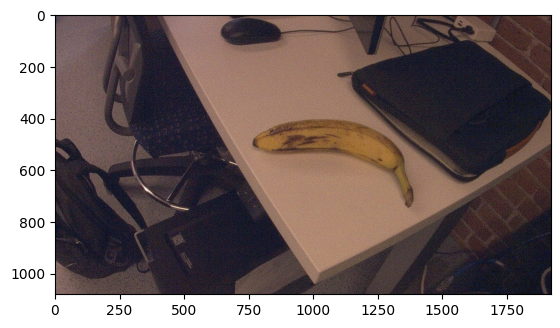

In [5]:
img = cv2.imread("inogeni_banana_pic.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
yolo_predictor = YoloPredictor(
                    exp_name="yolox-x",
                    config_file_path=osp.join(PROJ_ROOT,"configs/yolox/bop_pbr/yolox_x_640_augCozyAAEhsv_ranger_30_epochs_ycbv_pbr_ycbv_bop_test.py"),
                    ckpt_file_path=osp.join(PROJ_ROOT,"output/yolox/bop_pbr/yolox_x_640_augCozyAAEhsv_ranger_30_epochs_ycbv_pbr_ycbv_bop_test/model_final.pth"),
                    fuse=True,
                    fp16=False
                    )

[1106_104933 det.yolox.engine.yolox_setup@99]: Rank of current process: 0. World size: 1
[1106_104933 det.yolox.engine.yolox_setup@100]: Environment info:
-------------------------------  ------------------------------------------------------------------------------------
sys.platform                     linux
Python                           3.8.10 (default, May 26 2023, 14:05:08) [GCC 9.4.0]
numpy                            1.22.4
detectron2                       0.6 @/home/meuli/gdrnpp_wkspc/.venv/lib/python3.8/site-packages/detectron2
Compiler                         GCC 9.4
CUDA compiler                    CUDA 11.6
detectron2 arch flags            8.6
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          1.13.1+cu116 @/home/meuli/gdrnpp_wkspc/.venv/lib/python3.8/site-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            NVIDIA GeForce RTX 3080 (arch=8

In [7]:
from det.yolox.utils import get_model_info, fuse_model, postprocess, vis
def vis_yolo(output, rgb_image, class_names, cls_conf=0.35):
    # rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
    if output is None:
        return rgb_image
    output = output.cpu()

    bboxes = output[:, 0:4]

    cls = output[:, 6]
    scores = output[:, 4] * output[:, 5]

    vis_res = vis(rgb_image, bboxes, scores, cls, cls_conf, class_names)
    return vis_res

In [8]:
img_resize = cv2.resize(img, dsize=(680, 420), interpolation=cv2.INTER_CUBIC)

/home/meuli/gdrnpp_wkspc/gdrnpp_bop2022/core/gdrn_modeling/demo/predictor_yolo.py:137: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  detections = torch.tensor(detections[detections[:, 6].argsort()])


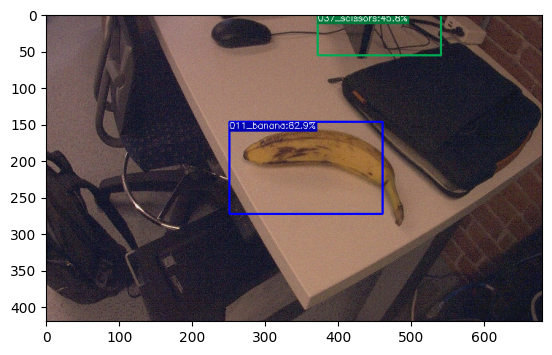

In [9]:
output = yolo_predictor.inference(img_resize)
out = vis_yolo(output[0], img_resize, classes, cls_conf=0.35)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

In [10]:
gdrn_predictor = GdrnPredictor(
                    config_file_path=osp.join(PROJ_ROOT,"configs/gdrn/ycbv/convnext_a6_AugCosyAAEGray_BG05_mlL1_DMask_amodalClipBox_classAware_ycbv.py"),
                    ckpt_file_path=osp.join(PROJ_ROOT,"output/gdrn/ycbv/model_final_wo_optim.pth"),
                    # ckpt_file_path=osp.join(PROJ_ROOT,"output/gdrn/ycbv/model_tomato_soup_can.pth"),
                    camera_json_path=osp.join(PROJ_ROOT,"datasets/BOP_DATASETS/ycbv/camera_cmu.json"),
                    path_to_obj_models=osp.join(PROJ_ROOT,"datasets/BOP_DATASETS/ycbv/models")
)

[1106_234940@predictor_gdrn:602] optimizer_cfg: {'type': 'Ranger', 'lr': 0.0008, 'weight_decay': 0.01}


20231106_104941|core.utils.default_args_setup@123: Rank of current process: 0. World size: 1
20231106_104941|core.utils.default_args_setup@124: Environment info:
-------------------------------  ------------------------------------------------------------------------------------
sys.platform                     linux
Python                           3.8.10 (default, May 26 2023, 14:05:08) [GCC 9.4.0]
numpy                            1.22.4
detectron2                       0.6 @/home/meuli/gdrnpp_wkspc/.venv/lib/python3.8/site-packages/detectron2
Compiler                         GCC 9.4
CUDA compiler                    CUDA 11.6
detectron2 arch flags            8.6
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          1.13.1+cu116 @/home/meuli/gdrnpp_wkspc/.venv/lib/python3.8/site-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            NVIDIA GeForce RTX 3080 

[1106_104941 d2.utils.env@41]: Using a generated random seed 41742945


20231106_104941|core.utils.default_args_setup@144: Full config saved to output/gdrn/ycbv/convnext_a6_AugCosyAAEGray_BG05_mlL1_DMask_amodalClipBox_classAware_ycbv/convnext_a6_AugCosyAAEGray_BG05_mlL1_DMask_amodalClipBox_classAware_ycbv.py
20231106_104941|core.utils.default_args_setup@162: Used mmcv backend: cv2
Global seed set to 41742945
20231106_104942|timm.models.helpers@244: Loading pretrained weights from url (https://dl.fbaipublicfiles.com/convnext/convnext_base_1k_224_ema.pth)


: 

In [ ]:
data_dict = gdrn_predictor.preprocessing(outputs=output, image=img)

NameError: name 'gdrn_predictor' is not defined

In [ ]:
print(data_dict)

In [ ]:
out_dict = gdrn_predictor.inference(data_dict)

In [ ]:
poses = gdrn_predictor.postprocessing(data_dict, out_dict)

In [ ]:
print(poses['011_banana'])

In [ ]:
gdrn_imgs = gdrn_predictor.gdrn_visualization(batch=data_dict, out_dict=out_dict, image=img)

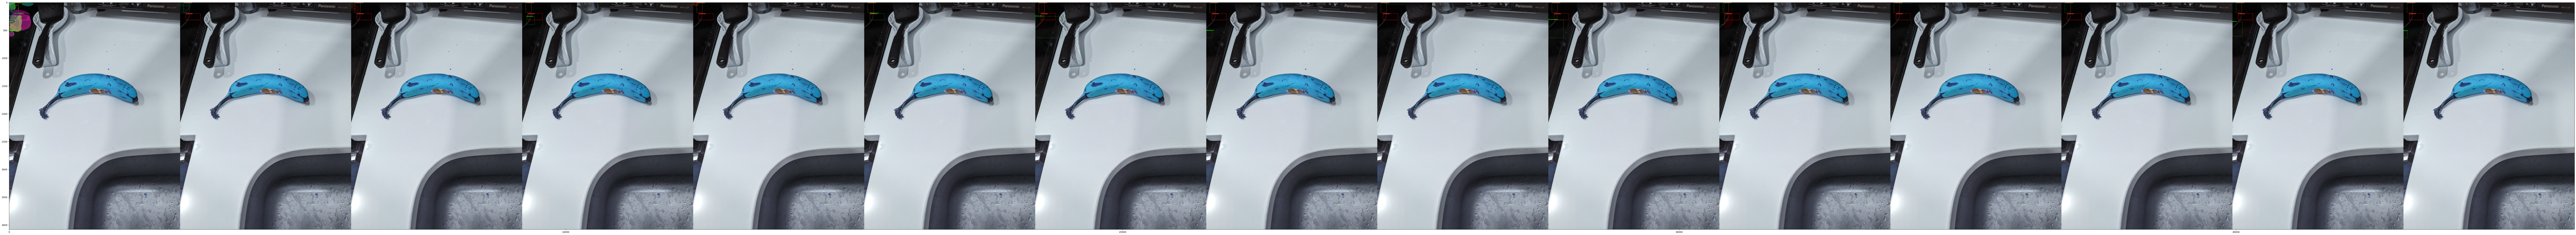

In [ ]:
plt.figure(figsize=(200,20))
plt.imshow(gdrn_imgs)

In [ ]:
img = cv2.imread(img_dir)
output = yolo_predictor.inference(img)
data_dict = gdrn_predictor.preprocessing(outputs=output, image=img)
out_dict = gdrn_predictor.inference(data_dict)
poses = gdrn_predictor.postprocessing(data_dict, out_dict)